In [20]:
from keras.layers import *
from keras.models import Model
from keras import layers
from keras.layers.merge import concatenate
import sys
sys.path.insert(1, '../image_segmentation_keras')
from keras_segmentation.models.config import IMAGE_ORDERING

from keras_segmentation.models.model_utils import get_segmentation_model
from glob import glob


In [21]:
input_height = 256
input_width = 256
n_classes = 3
channels = 3

In [22]:
def unet_conv_block(inputs, filters, pool=True, batch_norm_first=True):
    if batch_norm_first == True:
        x = Conv2D(filters, 3, padding="same")(inputs)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)

        x = Conv2D(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
    elif batch_norm_first == False:
        x = Conv2D(filters, 3, padding="same")(inputs)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)

        x = Conv2D(filters, 3, padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)

    if pool == True:
        p = MaxPooling2D((2, 2))(x)
        return [x, p]
    else:
        return x

In [23]:
img_input = Input(shape=(input_height,input_width, channels))
f1 = unet_conv_block(img_input, 64, pool=True, batch_norm_first=True)
f2 = unet_conv_block(f1[1], 128, pool=True, batch_norm_first=True)
f3 = unet_conv_block(f2[1], 256, pool=True, batch_norm_first=True)
f4 = unet_conv_block(f3[1], 512, pool=True, batch_norm_first=True)
f5 = unet_conv_block(f4[1], 1024, pool=False, batch_norm_first=True)

x = UpSampling2D((2, 2))(f5)
x = concatenate([x, f4[0]], axis=3)
x = unet_conv_block(x, 512, pool=False, batch_norm_first=True)

x = UpSampling2D((2, 2))(x)
x = concatenate([x, f3[0]], axis=3)
x = unet_conv_block(x, 256, pool=False, batch_norm_first=True)

x = UpSampling2D((2, 2))(x)
x = concatenate([x, f2[0]], axis=3)
x = unet_conv_block(x, 128, pool=False, batch_norm_first=True)

x = UpSampling2D((2, 2))(x)
x = concatenate([x, f1[0]], axis=3)
x = unet_conv_block(x, 64, pool=False, batch_norm_first=True)

x = Conv2D(n_classes, (1, 1), padding='same')(x)

model = get_segmentation_model(img_input, x)


In [24]:
model.load_weights("/Users/mavaylon/Research/pet_weights/UNET_VANILLA/pet_class_crf.h5")

In [25]:
import glob

img_names = sorted(glob.glob("/Users/mavaylon/Research/pet_predictions/img/*.png"))

for name in img_names:
    out_name = "/Users/mavaylon/Research/pet_predictions/unet_vanilla_pred/" + name.split('/')[-1]
    print(out_name)
    out = model.predict_segmentation(inp=name, out_fname=out_name)

/Users/mavaylon/Research/pet_predictions/unet_vanilla_pred/1Russian_Blue_114.png
/Users/mavaylon/Research/pet_predictions/unet_vanilla_pred/213leonberger_197.png
/Users/mavaylon/Research/pet_predictions/unet_vanilla_pred/244samoyed_39.png
/Users/mavaylon/Research/pet_predictions/unet_vanilla_pred/270Persian_44.png
/Users/mavaylon/Research/pet_predictions/unet_vanilla_pred/271Egyptian_Mau_143.png


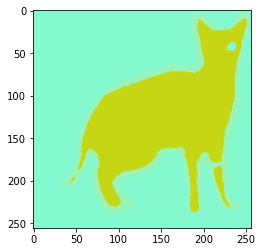

In [14]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/Users/mavaylon/Research/pet_predictions/unet_vanilla_pred/271Egyptian_Mau_143.png')
plt.imshow(img)

In [15]:
img

array([[[132, 248, 207],
        [132, 248, 207],
        [132, 248, 207],
        ...,
        [132, 248, 207],
        [132, 248, 207],
        [132, 248, 207]],

       [[132, 248, 207],
        [132, 248, 207],
        [132, 248, 207],
        ...,
        [132, 248, 207],
        [132, 248, 207],
        [132, 248, 207]],

       [[132, 248, 207],
        [132, 248, 207],
        [132, 248, 207],
        ...,
        [132, 248, 207],
        [132, 248, 207],
        [132, 248, 207]],

       ...,

       [[132, 248, 207],
        [132, 248, 207],
        [132, 248, 207],
        ...,
        [132, 248, 207],
        [132, 248, 207],
        [132, 248, 207]],

       [[132, 248, 207],
        [132, 248, 207],
        [132, 248, 207],
        ...,
        [132, 248, 207],
        [132, 248, 207],
        [132, 248, 207]],

       [[132, 248, 207],
        [132, 248, 207],
        [132, 248, 207],
        ...,
        [132, 248, 207],
        [132, 248, 207],
        [132, 248, 207]]